In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def show(skel_positions=None, links=None, joint_names=None, mesh_positions=None, faces=None):
    # Plotting
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    # Plot skeleton
    if skel_positions is not None:
        ax.scatter(skel_positions[:, 0], skel_positions[:, 1], skel_positions[:, 2], marker='o', c='r', s=20, label='Skeleton')

        if links is not None:
            for link in links:
                start_pos, end_pos = skel_positions[link[0]], skel_positions[link[1]]
                ax.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], [start_pos[2], end_pos[2]], 'black')

        if joint_names is not None:
            for i, name in enumerate(joint_names):
                ax.text(skel_positions[i, 0], skel_positions[i, 1], skel_positions[i, 2], name)

    # Plot mesh
    if mesh_positions is not None:
        ax.scatter(mesh_positions[:, 0], mesh_positions[:, 1], mesh_positions[:, 2], marker='o', c='b', s=0.05, label='Mesh')

        if faces is not None:
            for face in faces:
                face_vertices = mesh_positions[face]
                face_vertices = np.append(face_vertices, [face_vertices[0]], axis=0)
                ax.plot(face_vertices[:, 0], face_vertices[:, 1], face_vertices[:, 2], color='r', linewidth=0.01, label='Faces')

    # Set labels and limits
    all_positions = np.concatenate([skel_positions, mesh_positions], axis=0) if skel_positions is not None and mesh_positions is not None else skel_positions if skel_positions is not None else mesh_positions
    if all_positions is not None:
        max_range = np.array([all_positions[:, 0].max() - all_positions[:, 0].min(),
                              all_positions[:, 1].max() - all_positions[:, 1].min(),
                              all_positions[:, 2].max() - all_positions[:, 2].min()]).max() / 2.0
        mid_x = (all_positions[:, 0].max() + all_positions[:, 0].min()) * 0.5
        mid_y = (all_positions[:, 1].max() + all_positions[:, 1].min()) * 0.5
        mid_z = (all_positions[:, 2].max() + all_positions[:, 2].min()) * 0.5

        ax.set_xlim(mid_x - max_range, mid_x + max_range)
        ax.set_ylim(mid_y - max_range, mid_y + max_range)
        ax.set_zlim(mid_z - max_range, mid_z + max_range)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.legend()
    plt.show()

def show_mesh_dir(directory, show_faces=False):
    # Find the numpy files in the directory
    files = os.listdir(directory)
    vertices_file = None
    faces_file = None
    for file in files:
        if file.endswith("_vertices.npy"):
            vertices_file = os.path.join(directory, file)
        elif file.endswith("_faces.npy"):
            faces_file = os.path.join(directory, file)

    # Load data from numpy files
    if vertices_file:
        vertices = np.load(vertices_file)
    else:
        print("Required _vertices.npy file not found in the directory.")
        return        
    
    if show_faces and faces_file:
        faces = np.load(faces_file)
        # Use the show function from utils.py
        show(mesh_positions=vertices, faces=faces)
    else:
        # Use the show function from utils.py
        show(mesh_positions=vertices)

def show_skel_dir(directory):
    # Find the numpy files in the directory
    files = os.listdir(directory)
    skel_file = None
    link_file = None
    names_file = None
    for file in files:
        if file.endswith("_skel.npy"):
            skel_file = os.path.join(directory, file)
        elif file.endswith("_link.npy"):
            link_file = os.path.join(directory, file)
        elif file.endswith("_names.npy"):
            names_file = os.path.join(directory, file)

    # Load data from numpy files
    if skel_file:
        global_positions = np.load(skel_file)
        links = np.load(link_file) if link_file else None
        joint_names = np.load(names_file, allow_pickle=True) if names_file else None

        # Use the show function from utils.py
        show(skel_positions=global_positions, links=links, joint_names=joint_names)
    else:
        print("Required _skel.npy file not found in the directory.")
        
def show_dir(directory, show_faces=False):
    """
    Show the mesh and skeleton in the directory.
    
    Parameters:
    - directory: The directory containing the numpy files.
    - show_faces: A boolean flag indicating whether to show faces (default: False).
    """
    # Find the numpy files in the directory
    files = os.listdir(directory)
    vertices_file = None
    faces_file = None
    skel_file = None
    link_file = None
    names_file = None
    for file in files:
        if file.endswith("_vertices.npy"):
            vertices_file = os.path.join(directory, file)
        elif file.endswith("_faces.npy"):
            faces_file = os.path.join(directory, file)
        elif file.endswith("_skel.npy"):
            skel_file = os.path.join(directory, file)
        elif file.endswith("_link.npy"):
            link_file = os.path.join(directory, file)
        elif file.endswith("_names.npy"):
            names_file = os.path.join(directory, file)

    # Load data from numpy files
    vertices = np.load(vertices_file) if vertices_file else None
    faces = np.load(faces_file) if faces_file and show_faces else None
    skel_positions = np.load(skel_file) if skel_file else None
    links = np.load(link_file) if link_file else None
    joint_names = np.load(names_file, allow_pickle=True) if names_file else None

    # Use the show function to display mesh and skeleton
    show(skel_positions=skel_positions, links=links, joint_names=joint_names, mesh_positions=vertices, faces=faces)
    

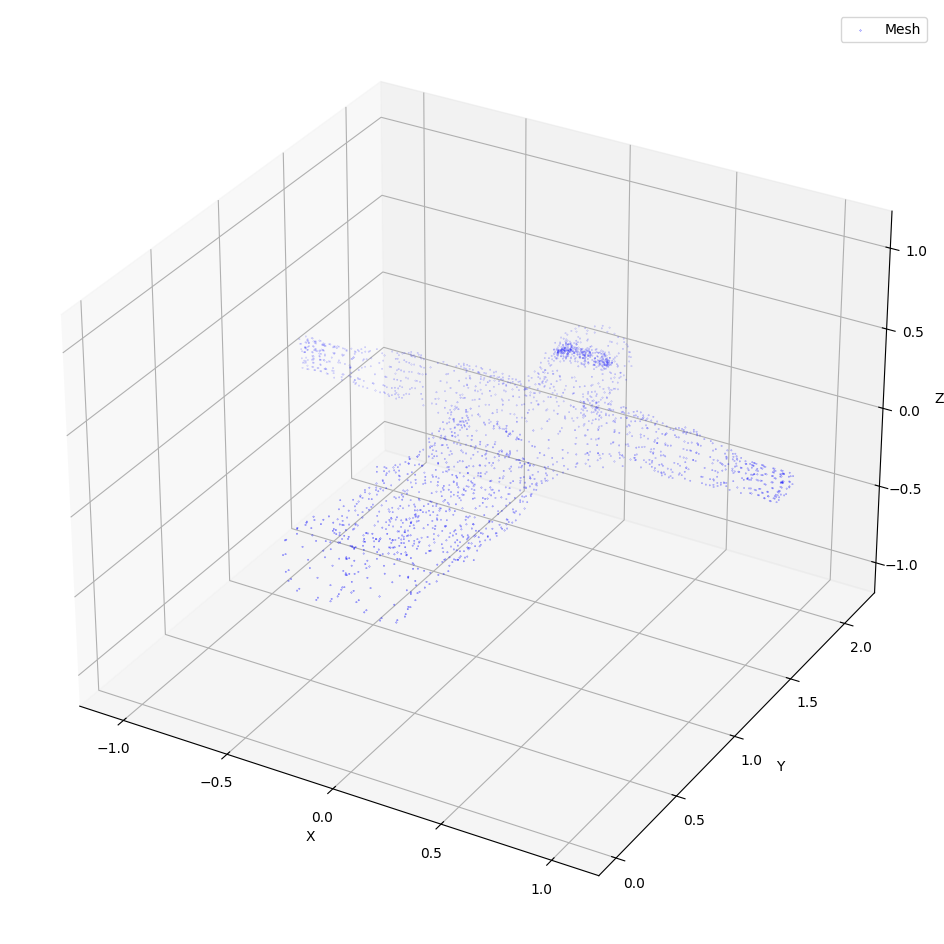

In [9]:
directory = "./000"
show_mesh_dir(directory)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

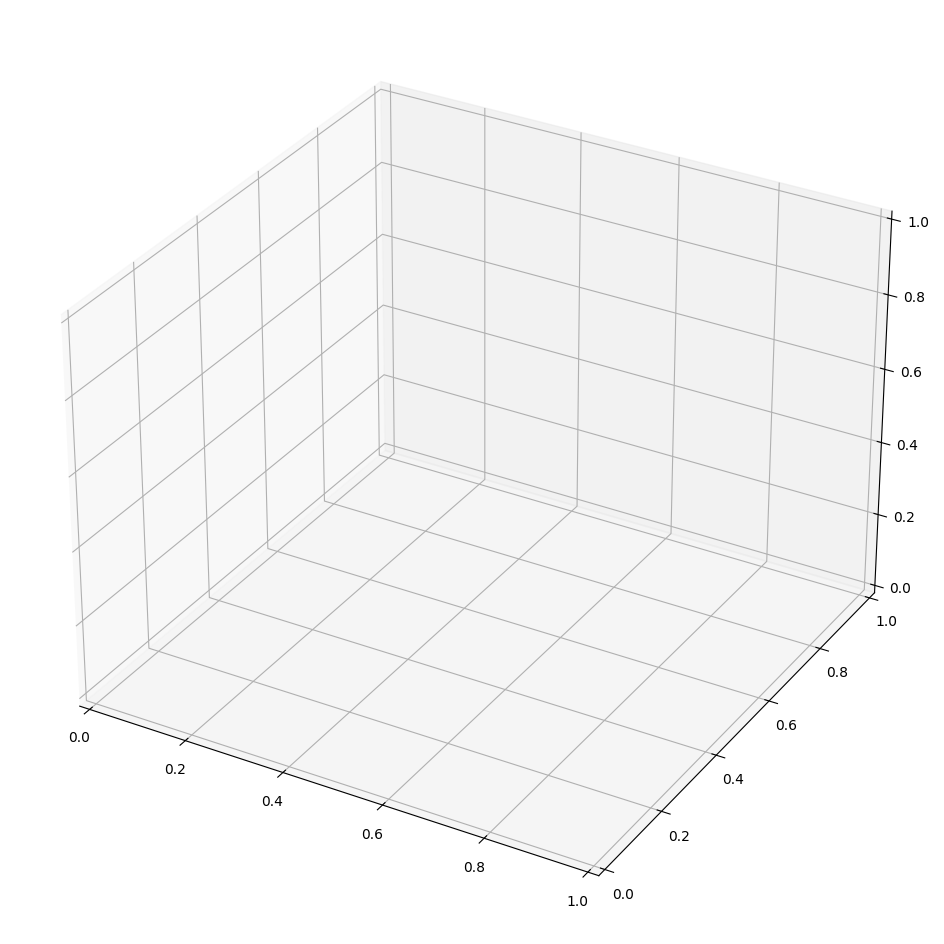

In [10]:
directory = "./000"
show_skel_dir(directory)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

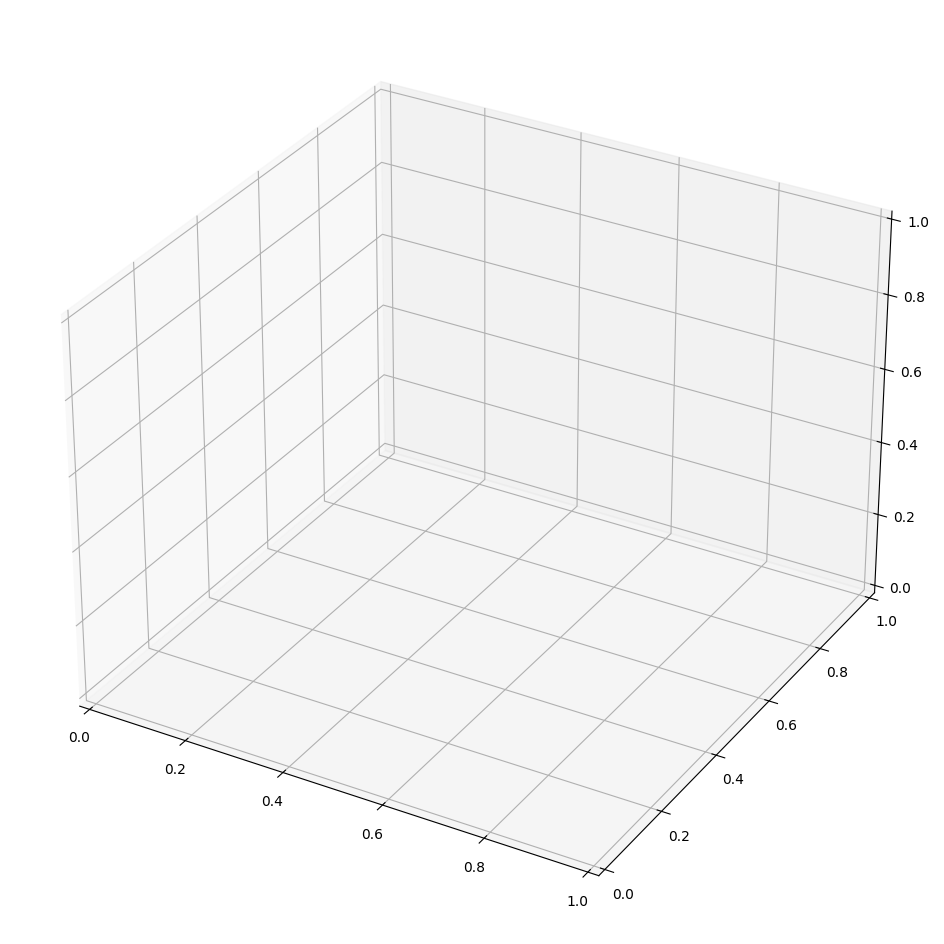

In [11]:
directory = "./000"
show_dir(directory)